__딥러닝 모델을 구성하는 레이어 특히 Linear, Convolution의 동작 방식에 대해서 알아보자.__

딥러닝을 공부할 때 통계나 수학 그리고 인공 신경망 네트워크(ANN)을 설계하면서 감을 익힌다. 하지만 수학과 설계 사이의 미싱 링크를 느낄 수 있었을것이다. 예를들어 $y=Wx+b$에서 최적의 $W$(weight)와 $b$를 찾는 과정이다.   

딥러닝의 수많은 신경망들은 각각 다른 Weight와 독특한 특성을 갖고 있다. 데이터에서 원하는 특징을 효과적으로 추출하기 위해 올바른 Weight를 정의하는 과정이 중요하다. 이 과정은 신경망을 분석하거나 설계하는 데에 큰 도움이 될 수 있으므로 잘 알아두자.   

이번 노드에서는 `Linear`와 `Convolution`레이어에 대해 집중적으로 알아보자.

# 1. 데이터의 형태

데이터의 형태 변화를 보고 이해해보자. 예를들어 10개의 단어로 이루어진 문장을 5개의 단어로 요약했으면 정보를 집약시킨것이고, 20개의 단어로 확장했다면 정보를 세밀하게 표현했음을 짐작할 수 있다.   

이미지 데이터는 채널이라는 데이터를 갖고 있다. 많이 쓰는 RGB 이미지를 보면 R, G, B로 나눠져있다. 그래서 매트릭스로 (Channel, Width, Height) 이렇게 표현한다.   

해상도가 1280x1024(30fps) 러닝타임(T)가 90분인 흑백 영화는 어떻게 표기할까?   
(T, C, W, H)로 봤을때 (90x60x30=162000, 1, 1280, 1024)로 표기한다.

레이어란?
> 하나의 물체가 여러 개의 논리적인 객체들로 구성되어 있는 경우, 각각의 객체를 하나의 레이어라 한다.   

신경망을 구성하는 여러 개의 레이어들을 이해하면 신경망을 이해하는 것과 같다. 그리고 이러한 레이어에 Weight가 있어서 어떠한 물체를 인식할 때 신경망을 써서 인식한다.   
![](https://d3s0tskafalll9.cloudfront.net/media/images/F-24-5.max-800x600.png)

# 2. Linear 레이어

선형대수학에서 쓰이는 용어 중에 선형 변환(Linear Transform)이 있는데 이것과 동일한 기능을 하는 레이어이다. 관련 영상은 [Linear transformations and matrices | Chapter 3, Essence of linear algebra
](https://youtu.be/kYB8IZa5AuE) 여기서 자세하게 설명해준다.   

Linear 레이어는 선형 변환을 활용해서 데이터를 특정 차원으로 변환하는 기능을 한다고 한다. 위의 영상에서는 i hat과 j hat으로 표현한다. 100차원의 데이터를 300차원으로 변환하면 데이터를 풍부하게 표현하는 효과가 있고, 10차원의 데이터로 변환하면 집약시키는 효과가 있다.   


![](https://d3s0tskafalll9.cloudfront.net/media/images/F-24-6.max-800x600.png)

위의 사각형 그림을 보면 모두 2차원에 점 4개로 표현 가능하므로 (4, 2) 행렬 형태의 데이터로 표현할 수 있다. 두 사각형을 각각 하나의 정수로 표현하고자 할 때 어떻게 집약시킬지 구상해보자.   
> 1. (4,2)x(2,1) 행렬= (4,)
2. (4,)x(4,1) 행렬= (1,)

2차원을 1차원으로 변환하는데 (2,1) 행렬이 선언되고, 4차원을 1차원으로 변환하는데 (4,1)행렬이 선언 되었다. 각각의 행렬들이 Weight로 Linear 레이어는 (입력의 차원, 출력의 차원)의 Wieght를 가지는 특성이 있다.

In [1]:
import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size, 4, 2))     # Tensorflow는 Batch를 기반으로 동작하기에,
                                         # 우리는 사각형 2개 세트를 batch_size개만큼
                                         # 만든 후 처리를 하게 됩니다.
print("1단계 연산 준비:", boxes.shape)

first_linear = tf.keras.layers.Dense(units=1, use_bias=False) 
# units은 출력 차원 수를 의미합니다.
# Weight 행렬 속 실수를 인간의 뇌 속 하나의 뉴런 '유닛' 취급을 하는 거죠!

first_out = first_linear(boxes)
first_out = tf.squeeze(first_out, axis=-1) # (4, 1)을 (4,)로 변환해줍니다.
                                           # (불필요한 차원 축소)

print("1단계 연산 결과:", first_out.shape)
print("1단계 Linear Layer의 Weight 형태:", first_linear.weights[0].shape)

print("\n2단계 연산 준비:", first_out.shape)

second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=-1)

print("2단계 연산 결과:", second_out.shape)
print("2단계 Linear Layer의 Weight 형태:", second_linear.weights[0].shape)

1단계 연산 준비: (64, 4, 2)
1단계 연산 결과: (64, 4)
1단계 Linear Layer의 Weight 형태: (2, 1)

2단계 연산 준비: (64, 4)
2단계 연산 결과: (64,)
2단계 Linear Layer의 Weight 형태: (4, 1)


![](https://d3s0tskafalll9.cloudfront.net/media/images/F-24-7.max-800x600.png)

하지만 사각형 각각 1차원으로 바뀌는 (2,1) Weight를 줬을 때 결과값이 같아진다. 여기서 Weight의 모든 요소를 Parameter라고 한다. 이렇게 데이터를 집약했을 때 데이터 손실이 일어날 수 있음을 볼 수 있다. 그래서 이번엔 데이터를 풍부하게 만들어보자.   
> 1. (4,2)x(2x3) 행렬 = (4,3)
2. (4,3)x(3x1) 행렬 = (4,)
3. (4,)x(4x1) 행렬 = (1,)

![](https://d3s0tskafalll9.cloudfront.net/media/images/F-24-8.max-800x600.png)

1에서 2x3=6개, 2에서 3x1=3개, 3에서 4x1=4개 총 13개의 파라미터가 Weight 가중치로 쓰였다. 이를 `tf.keras.layers.Layer.count_params()` 함수로 구현하면 다음과 같다.

In [5]:
import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size, 4, 2))

print("1단계 연산 준비:", boxes.shape)

first_linear = tf.keras.layers.Dense(units=3, use_bias=False)
first_out = first_linear(boxes)

print("1단계 연산 결과:", first_out.shape)
print("1단계 Linear Layer의 Weight 형태:", first_linear.weights[0].shape)

print("\n2단계 연산 준비:", first_out.shape)

second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=-1)

print("2단계 연산 결과:", second_out.shape)
print("2단계 Linear Layer의 Weight 형태:", second_linear.weights[0].shape)

print("\n3단계 연산 준비:", second_out.shape)

third_linear = tf.keras.layers.Dense(units=1, use_bias=False)
third_out = third_linear(second_out)
third_out = tf.squeeze(third_out, axis=-1)

print("3단계 연산 결과:", third_out.shape)
print("3단계 Linear Layer의 Weight 형태:", third_linear.weights[0].shape)

total_params = \
first_linear.count_params() + \
second_linear.count_params() + \
third_linear.count_params()

print("총 Parameters:", total_params)

1단계 연산 준비: (64, 4, 2)
1단계 연산 결과: (64, 4, 3)
1단계 Linear Layer의 Weight 형태: (2, 3)

2단계 연산 준비: (64, 4, 3)
2단계 연산 결과: (64, 4)
2단계 Linear Layer의 Weight 형태: (3, 1)

3단계 연산 준비: (64, 4)
3단계 연산 결과: (64,)
3단계 Linear Layer의 Weight 형태: (4, 1)
총 Parameters: 13


그러면 Parameter가 많은게 좋다고 생각할 수도있는데 이는 Overfitting을 가져올 수 있다. 그래서 Weight의 형태만 선언해주고 데이터가 가진 분포에 따라 적합한 Weight를 찾아가는 과정을 훈련(training)이라고 한다. 

__편향(Bias)__   
![](https://d3s0tskafalll9.cloudfront.net/media/images/F-24_bias_graph.max-800x600.png)

위 그림을 보면 두 데이터가 비슷한 형태로 분포되어 있지만 파라미터의 변화(선형변환)로 둘을 일치시키기 어려워 보인다. 원점을 평행이동하는 것으로 해결할 수 있는데 선형변환된 값에 편향 파라미터 b를 더해주는 것으로 표현한다. $y=Wx+b$에 있는 $b$가 편향 값이다.   
코드 예제에 있는 Dense 클래스의 `use_bias`를 True로 바꾸면 실험해볼 수 있다.

# 3. 정보 집약의 Convolution 레이어

(1920x1080x3) 이미지를 살펴보려면 다음과 같은 과정을 거쳐야한다.   
(1920x1080x3)->(6220800) x [6220800 x 1 Weight] = (1,) 아무리 적어도 620만개의 파라미터가 생성된다. 그리고 레이어들을 펼쳐 픽셀로 만들고 한줄씩 살펴야 해서 비효율적이다. 그래서 Convolution 레이어가 고안됐다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/F-24_conv.max-800x600.png)

위는 3x3 사이즈의 필터 K를 선언하고 슬라이딩하며 각 픽셀을 곱하며 더하는 Convolution 연산을 표현하고 있다. 몇 칸씩 옮기면서 보는지 설정하는 값은 Stride이다. 그리고 입력 데이터의 테두리에 0을 추가하는 Padding도 있다. 자세한 설명은 [padding은 왜 할까?](https://brunch.co.kr/@coolmindory/37)을 살펴보자.   

![](https://d3s0tskafalll9.cloudfront.net/media/images/F-24-11.max-800x600.png)

그림처럼 convolution filter를 여러개 중첩하면 [필터의 개수 x 필터의 가로 x 필터의 세로]로 이루거진 Weight를 가진다는 사실을 알 수 있다.   
> 1. (1920, 1080, 3) x [16 x 5 x 5 x 3, Weight&Stride 5] = (384, 216, 16)
2. (384, 216, 16) -> (1327104) x [1327104 x 1 Weight] = (1,)

16개의 5x5 필터를 가진 Convolution 레이어를 Stride 5로 이미지 슬라이딩하고, 이렇게 생성된 출력을 1차원으로 펼쳐 Linear 레이어로 정보를 집약하는 과정이다. 필터들은 입력의 3채널에 적용되므로 3 x 16 x 5 x 5 = 1200개다.   
한개의 Convolution 레이어로 파라미터 수를 620만개에서 130만개로 크게 줄일 수 있었다. Convolution 레이어는 여러 겹의 레이어를 중첩하는 것이 일반적이고, 중첩할수록 최종 Linear 레이어는 작아진다. 입력에서 중요한 부분을 뽑아내는데 최적화이다.

In [6]:
import tensorflow as tf

batch_size = 64
pic = tf.zeros((batch_size, 1920, 1080, 3))

print("입력 이미지 데이터:", pic.shape)
conv_layer = tf.keras.layers.Conv2D(filters=16,
                                    kernel_size=(5, 5),
                                    strides=5,
                                    use_bias=False)
conv_out = conv_layer(pic)

print("\nConvolution 결과:", conv_out.shape)
print("Convolution Layer의 Parameter 수:", conv_layer.count_params())

flatten_out = tf.keras.layers.Flatten()(conv_out)
print("\n1차원으로 펼친 데이터:", flatten_out.shape)

linear_layer = tf.keras.layers.Dense(units=1, use_bias=False)
linear_out = linear_layer(flatten_out)

print("\nLinear 결과:", linear_out.shape)
print("Linear Layer의 Parameter 수:", linear_layer.count_params())

입력 이미지 데이터: (64, 1920, 1080, 3)

Convolution 결과: (64, 384, 216, 16)
Convolution Layer의 Parameter 수: 1200

1차원으로 펼친 데이터: (64, 1327104)

Linear 결과: (64, 1)
Linear Layer의 Parameter 수: 1327104


Convolution 레이어가 이미지 입력을 처리할 때 Linear 레이어 대비 적은 파라미터로 중요한 이미지 피처를 뽑아 효과적임을 알 수 있었다. 그리고 이미지는 지역성(locality)이 중요한 정보가 되는 경우가 있는데, Linear는 중요한 정보가 소실되고 큰 파라미터 속에서 입출력 사이의 관계 가중치를 찾아야하는 어려운 문제를 풀어야 한다. Convolution 레이어는 필터의 구조 안에 지역 정보가 보존된다.   
이렇게 인접한 픽셀들 사이에서 패턴을 추출할 수 있는게 불필요한 파라미터 및 연산량을 제거하고 효율적이게 정보를 집약시킬 수 있다.

# 4. 필터로 핵심을 추리는 Pooling 레이어

Convolution 레이어만으로 객체를 판별하는데 문제가 있을 수 있다.   
- 5x5 필터 사이즈는 object detection을 하기 위한 유의미한 정보를 담아내기에 작은 사이즈다.
- Stride 5를 줬는데 이 사이에 object가 경계선에 있으면 인식하지 못할 수 있다.

그렇다고 필터 사이즈를 키우면 파라미터와 연산량의 사이즈가 커지고 Accuracy도 떨어질 가능성이 높다. 그렇다면 어떻게 해결해야할까?   

__Receptive Field__(수용영역)을 크게 해야한다. 

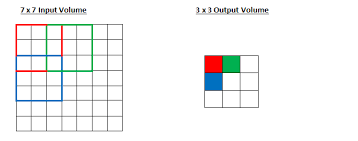

위의 이미지를 보면 7X7이미지에 3X3필터로 Convolution한 결과를 보여준다. 우측 빨간색 부분은 원본 이미지의 좌상단 3x3을 수용한 것인데, Receptive Field 크기가 Filter size와 같다. 

![](https://blog.kakaocdn.net/dn/biczZ1/btqED1eyDLf/c5cBddY5vw8DRo0K0S49L1/img.png)

Max Pooling의 장점으로 몇 가지가 있는데 알아보자.   
- translational invariance 효과   
Max Pooling을 통해 영역 중 가장 두드러진 특징 하나를 뽑는 것은 이미지가 약간의 시프트 효과에도 동일한 특징을 안정적으로 잡아낼 수 있다. 그리고 object 위치에 대한 오버피팅을 방지하고 안정적인 특징 추출 효과가 있다.   
- Non-linear 함수와 동일한 피처 추출 효과   
Relu같은 Non-linear 함수도 하위 많은 레이어의 연산 결과를 무시하는 효과를 발생하지만 그 결과 중요한 피처를 상위 레이어로 추출한다. 결과적으로 분류기의 성능을 증진시키는 효과를 가진다. Min, Max Pooling도 이와 동일하다.   
- Receptive Field 극대화 효과   
Max Pooling 없이 Receptive Field를 크게 하려면 Convolutional 레이어를 아주 많이 쌓아야한다. 그 결과 큰 파라미터로 인한 오버피팅, 연산량 증가, gradient vanishing 등 많은 문제를 감안해야한다. 해결하는 방법으로 Max Pooling이랑 Dilated Convolution이 있는데 [링크](https://m.blog.naver.com/sogangori/220952339643)를 참고하자.

# 5. 집약 정보 복원하는 Deconvolution 레이어

Convolution 레이어를 통해 집약된 정보는 원본 데이터를 너무 많이 손실한건 아닐까? 손실된 정보에 의존한 이미지 분류와 오브젝트 디텍션 등의 결과를 신뢰할 수 있을까? 와 같이 의구심을 품을 수 있다. 그래서 Convolution 결과를 역재생 해서 원본과 유사한 정보를 복원하는 오토 인코더에 알아보자.   

MNIST 데이터셋을 입력받아 그대로 복원하는 Auto Encoder를 만들어보자.

### MNIST 데이터셋 로딩

In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import json
import matplotlib.pyplot as plt #for plotting

# MNIST 데이터 로딩
(x_train, _), (x_test, _) = mnist.load_data()    # y_train, y_test는 사용하지 않습니다.

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

AutoEncoder가 수행하는 Image Reconstrction Task는 x_train 라벨이 x_train 자신이기 때문에 y_train, y_test를 사용하지 않는다.

### AutoEncoder 모델 구성

In [ ]:
# AutoEncoder 모델 구성 - Input 부분
input_shape = x_train.shape[1:]
input_img = Input(shape=input_shape)

# AutoEncoder 모델 구성 - Encoder 부분
encode_conv_layer_1 = Conv2D(16, (3, 3), activation='relu', padding='same')
encode_pool_layer_1 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
encode_pool_layer_2 = MaxPooling2D((2, 2), padding='same')
encode_conv_layer_3 = Conv2D(4, (3, 3), activation='relu', padding='same')
encode_pool_layer_3 = MaxPooling2D((2, 2), padding='same')

encoded = encode_conv_layer_1(input_img)
encoded = encode_pool_layer_1(encoded)
encoded = encode_conv_layer_2(encoded)
encoded = encode_pool_layer_2(encoded)
encoded = encode_conv_layer_3(encoded)
encoded = encode_pool_layer_3(encoded)

# AutoEncoder 모델 구성 - Decoder 부분
decode_conv_layer_1 = Conv2D(4, (3, 3), activation='relu', padding='same')
decode_upsample_layer_1 = UpSampling2D((2, 2))
decode_conv_layer_2 = Conv2D(8, (3, 3), activation='relu', padding='same')
decode_upsample_layer_2 = UpSampling2D((2, 2))
decode_conv_layer_3 = Conv2D(16, (3, 3), activation='relu')
decode_upsample_layer_3 = UpSampling2D((2, 2))
decode_conv_layer_4 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')

decoded = decode_conv_layer_1(encoded)   # Decoder는 Encoder의 출력을 입력으로 받습니다.
decoded = decode_upsample_layer_1(decoded)
decoded = decode_conv_layer_2(decoded)
decoded = decode_upsample_layer_2(decoded)
decoded = decode_conv_layer_3(decoded)
decoded = decode_upsample_layer_3(decoded)
decoded = decode_conv_layer_4(decoded)

# AutoEncoder 모델 정의
autoencoder = Model(input_img, decoded)
autoencoder.summary()

Output shape를 변화시키는건 `MaxPooling2D`레이어만 한다. 그래서 Encoder를 통과한 직후에 Output은 4x4가 되어있다. 우리가 하려는 것은 Decoder 레이어인데 Con2D와 UpSampling2D 레이어를 거쳐 28x28이 된다.

### AutoEncoder 모델 훈련

In [ ]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

loss로 분류 모델에서 사용되는 `binary_crossentropy`를 사용했다. 모든 dim에서 0~1사이의 값을 가진 입력 데이터와 출력 데이터(마지막 sigmoid) 사이의 분포가 최대한 유사하는 바람에 loss는 타당하다고 한다.

### AutoEncoder Reconstruction Test

In [ ]:
x_test_10 = x_test[:10]       # 테스트 데이터셋에서 10개만 골라서
x_test_hat = autoencoder.predict(x_test_10)    # AutoEncoder 모델의 이미지 복원생성
x_test_imgs = x_test_10.reshape(-1, 28, 28)
x_test_hat_imgs = x_test_hat.reshape(-1, 28, 28)

plt.figure(figsize=(12,5))  # 이미지 사이즈 지정
for i in range(10):  
    # 원본이미지 출력
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_imgs[i])
    # 생성된 이미지 출력
    plt.subplot(2, 10, i+11)
    plt.imshow(x_test_hat_imgs[i])

이미지를 제대로 생성하는지 확인해봤다. 하지만 동일한 Decoder 네트워크 구조를 갖고 Variational Autoencoder나 DCGAN 등은 훌륭한 이미지를 생성하기 때문에, Decoder 네트워크 구조의 문제만은 아닐것이다.

### Decoder Layers for Reconstruction

위의 Decoder에서 이미지 복원을 위해 사용한 Convolution 레이어는 Encoder에서 사용한 것과 동일하다. 그래서 크기도 변하지 않은 채 채널 개수만 2배로 늘리고 있어 Convolution 레이어를 거쳐 정보가 집약되는 것이 아닌 많아지고 있다.   

Convolution의 수학적 역연산으로 Deconvolution과는 다르다. 오히려 정방향 Convolution 연산을 통해 원본 이미지와 가까운 이미지를 재생하는 효과를 구현한 것이다. 

### Upsampling 레이어